#### Normalized Cuts and Image Segmentation

# Application à des images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.spatial

## Algorithme complet
(voir *La séparation de deux Gaussiennes* pour le détail)

In [2]:
def ncut(V, W):
    """
    Applique l'algorithme de séparation en deux clusters pour un critère x < 0, x > 0
    """
    d = np.sum(W, axis=0)
    D = np.diag(d)
    D_tmp = np.diag(d ** (-0.5))
    M = D_tmp.dot(D - W).dot(D_tmp)
    (eigen_values, eigen_vectors) = scipy.linalg.eig(M)
    idx = (-eigen_values).argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    x_temp = eigen_vectors[:, 1]
    x = np.where(x_temp < 0, -1, 1)
    A = V[np.where(x < 0)[0]]
    B = V[np.where(x > 0)[0]]

    return (A, B)

## Création de graphes à partir d'images

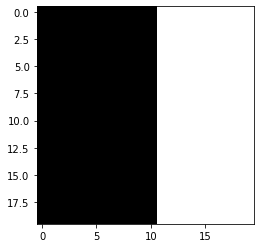

In [3]:
I = plt.imread("images/bandeVert.png")
I = 0.2989 * I[:, :, 0] + 0.5870 * I[:, :, 1] + 0.1140 * I[:, :, 2]
plt.imshow(I, cmap="gray")
plt.show()

In [4]:
(nx, ny) = I.shape
mesh = np.meshgrid(np.linspace(0, nx - 1, nx), np.linspace(0, ny - 1, ny))
V = np.array([mesh[0].ravel(), mesh[1].ravel()]).T

On construit $W$ comme étant ici la différence de couleur entre les pixels, en ne prenant pas du tout en compte l'écart géométrique.

In [5]:
W_cond = scipy.spatial.distance.pdist(I.ravel().reshape(-1, 1))
W = scipy.spatial.distance.squareform(W_cond)

In [6]:
(A, B) = ncut(V, W)

Si le résultat semble satisfaisant, il serait plus approprié de prendre une distance prenant en considération l'écart géométrique à coupler avec l'usage de **matrices creuses** afin de réduire drastiquement le temps de calcul qui est bien trop long actuellement.

Comme annoncé dans l'article, on a ici une complexité en $O(N^3)$ qui pourrait être réduire à une complexité en $O(N)$.

In [7]:
A.shape

(200, 2)

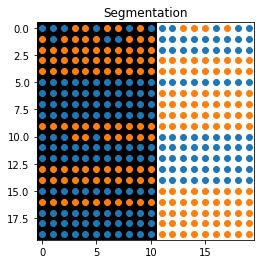

In [8]:
plt.imshow(I, cmap="gray")
plt.scatter(A[:, 0], A[:, 1])
plt.scatter(B[:, 0], B[:, 1])
ax = plt.gca()  # pour obtenir l'objet 'ax' courant
ax.set_aspect("equal")  # cela ne peut se faire que sur l'axe
plt.title("Segmentation")
# plt.savefig("camarchepas.png")
plt.show()